## Sentimental Analysis_British Airways Submitted by Viraj Panchal

Now since we have extracted data from the website, it is not cleaned and ready to be analyzed yet. The reviews section will need to be cleaned for punctuations, spellings and other characters. 

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
# Configuring inline plotting for Jupyter Notebooks
%matplotlib inline

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Additional imports can be added here
import re

In [2]:
# Reading the CSV file into a DataFrame
df = pd.read_csv("British.csv")

# Creating a deep copy of the DataFrame
df1 = df.copy(deep=True)

# Resetting the index of the copied DataFrame
df1 = df1.reset_index(drop=True)

# Now df1 is ready for further processing

In [3]:
# Display information about the DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3785 entries, 0 to 3784
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3785 non-null   int64  
 1   name         3785 non-null   object 
 2   rating       3780 non-null   float64
 3   varified     1471 non-null   object 
 4   reviews      3785 non-null   object 
 5   recommanded  2260 non-null   object 
 6   country      3783 non-null   object 
 7   published    3785 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 236.7+ KB


In [4]:
# Get unique values in the 'rating' column
unique_ratings = df1['rating'].unique()
print(f"Unique ratings: {unique_ratings}")


Unique ratings: [ 6.  1. 10.  7.  3.  4.  8.  5.  9.  2. nan]


In [5]:
# Drop rows with missing 'rating' values
df1 = df1.dropna(subset=['rating'])


In [6]:
# Get unique values in the 'rating' column after dropping missing values
updated_ratings = df1['rating'].unique()
print(f"Updated unique ratings: {updated_ratings}")


Updated unique ratings: [ 6.  1. 10.  7.  3.  4.  8.  5.  9.  2.]


In [7]:
# Check for null values in the DataFrame
null_counts = df1.isnull().sum()
print("Null value counts:")
print(null_counts)


Null value counts:
Unnamed: 0        0
name              0
rating            0
varified       2309
reviews           0
recommanded    1525
country           2
published         0
dtype: int64


In [8]:
# Convert the 'rating' column to integer type
df1['rating'] = df1['rating'].astype(int)


In [9]:
# Drop the 'varified' and 'recommanded' columns
df1 = df1.drop(['varified', 'recommanded'], axis=1)


#### What is the average overall rating given for British Airways?

In [10]:
# Calculating the mean of the 'rating' column
mean_rating = df1['rating'].mean()
print(f"Mean rating: {mean_rating}")

Mean rating: 4.720899470899471


#### What is the total counts for each ratings?


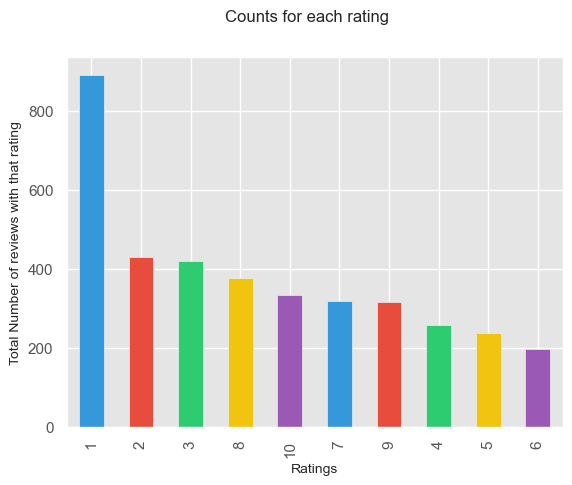

In [52]:
# Importing the matplotlib library
import matplotlib.pyplot as plt

# Setting a custom style
plt.style.use('ggplot')

# Plotting the value counts of the 'rating' column with a custom color palette
df1['rating'].value_counts().plot(kind="bar", color=['#3498db', '#e74c3c', '#2ecc71', '#f1c40f', '#9b59b6'])

# Setting the x and y labels
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")

# Setting the title of the plot
plt.suptitle("Counts for each rating")

# Displaying the plot
plt.show()



In [12]:
# Creating a DataFrame with the value counts of ratings
df1_ratings = pd.DataFrame(df1['rating'].value_counts())

# Calculating the percentage values for each rating
pct_values = (df1_ratings['rating'].values / df1_ratings['rating'].values.sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]
df1_ratings['pct_values'] = pct_values


In [13]:
# Resetting the index of the DataFrame
df1_ratings = df1_ratings.reset_index()


In [14]:
# Renaming columns to reflect the data accurately
df1_ratings.rename(columns={'index': 'rating', 'rating': 'count'}, inplace=True)
df1_ratings['pct_values'] = pct_values


In [15]:
# Displaying the DataFrame with counts and percentage values
print(df1_ratings)

   rating  count  pct_values
0       1    892       23.60
1       2    430       11.38
2       3    419       11.08
3       8    377        9.97
4      10    334        8.84
5       7    318        8.41
6       9    316        8.36
7       4    258        6.83
8       5    238        6.30
9       6    198        5.24


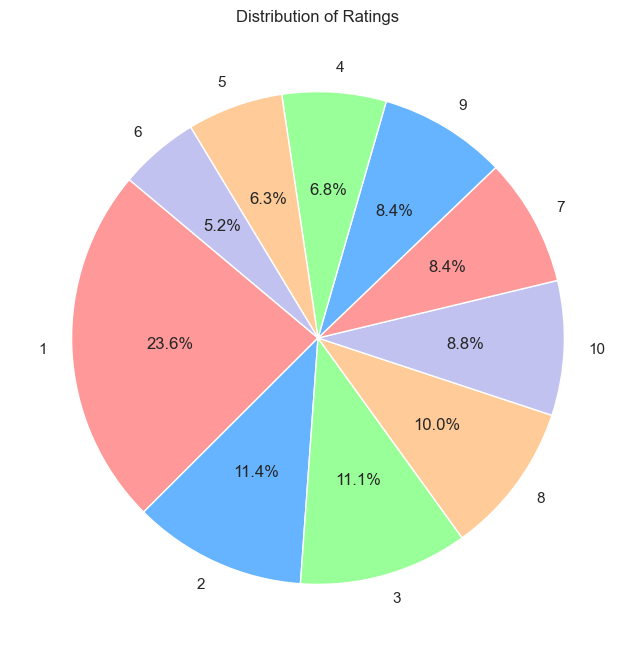

In [51]:
# Importing the Seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create a pie chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(df1_ratings['count'], labels=df1_ratings['rating'], autopct='%1.1f%%', startangle=140,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])  # Pastel color palette
plt.title('Distribution of Ratings')
plt.show()


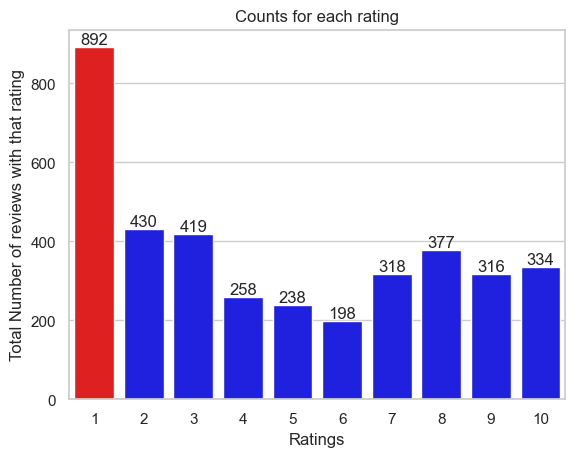

In [17]:
# Creating a color list based on the condition
clrs = ['Red' if (x == max(df1_ratings['count'])) else 'Blue' for x in df1_ratings['count']]

# Creating a bar plot with the custom colors
ax = sns.barplot(x='rating', y='count', data=df1_ratings, errwidth=0, palette=clrs)

# Adding labels to each bar
ax.bar_label(ax.containers[0])

# Setting the labels and title of the plot
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")

# Displaying the plot
plt.show()


#### Which country provided on average highest ratings?

In [18]:
# Unique countries BA recieved the reviews from

print(f"{len(df1.country.unique())} unique countries")

73 unique countries


In [19]:
df_country_review = pd.DataFrame(df1.country.value_counts().head()).reset_index()

In [20]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

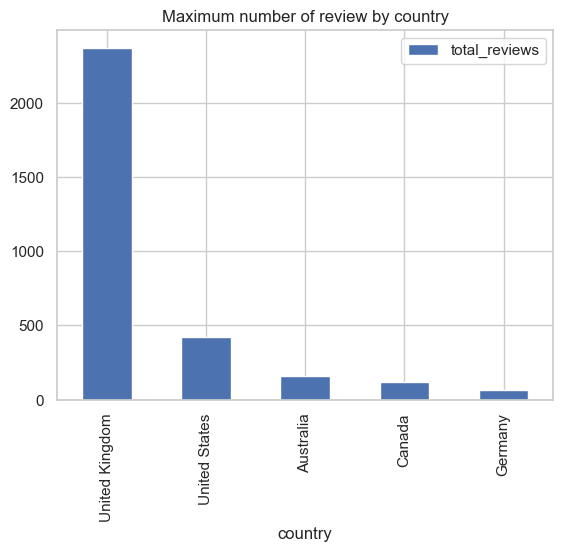

In [21]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [22]:
# Creating a new DataFrame from the 'reviews' column
df2 = pd.DataFrame(df1['reviews'])

# Displaying information about the new DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 0 to 3784
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3780 non-null   object
dtypes: object(1)
memory usage: 59.1+ KB


In [23]:
# Display the shape of the DataFrame
print(f"Number of rows: {df2.shape[0]}")
print(f"Number of columns: {df2.shape[1]}")


Number of rows: 3780
Number of columns: 1


In [24]:
# %%capture
# # Downloading necessary NLTK packages
# nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('vader_lexicon')

# # Installing the vaderSentiment package
# !pip install vaderSentiment


In [25]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Initialize the WordNetLemmatizer
lemma = WordNetLemmatizer()

# Function to convert NLTK's POS tags to the format expected by WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Use regular expression to replace the specified substrings with an empty string
df2['reviews_data'] = df2['reviews'].replace(to_replace=r"✅ Trip Verified \|", value="", regex=True)
df2['reviews_data'] = df2['reviews_data'].replace(to_replace=r"Not Verified \|", value="", regex=True)

# Create an empty list to collect the cleaned data corpus
corpus = []

# Loop through each review in the 'reviews_data' column
for rev in df2['reviews_data']:
    # Remove non-alphabetic characters and convert to lowercase
    rev = re.sub('[^a-zA-Z]+', ' ', rev)
    rev = rev.lower()
    # Split the review into words
    rev = rev.split()
    # Perform POS tagging on the words
    pos_tagged = pos_tag(rev)
    # Lemmatize the words using the POS tags
    rev = [lemma.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged if word not in set(stopwords.words("english"))]
    # Join the processed words back into a single string
    rev = " ".join(rev)
    # Add the processed review to the corpus
    corpus.append(rev)

# Now 'corpus' will contain the cleaned and lemmatized reviews


In [26]:
# add the corpus to the original dataframe

df2['corpus'] = corpus

In [27]:
# Resetting the index of the DataFrame
df2.reset_index(drop=True, inplace=True)


In [28]:
df2

,reviews,reviews_data,corpus
0,✅ Trip Verified | We chose Rotterdam and Lond...,We chose Rotterdam and London City airport b...,choose rotterdam london city airport convenien...
1,✅ Trip Verified | The entire booking and ticke...,The entire booking and ticketing experience h...,entire booking ticket experience stressful err...
2,Not Verified | British Airways cancelled my ...,British Airways cancelled my flight less th...,british airway cancel flight less hour automat...
3,Not Verified | I wanted to write this review s...,I wanted to write this review so I could give...,want write review could give huge thank one st...
4,✅ Trip Verified | Check in fast and friendly....,Check in fast and friendly. Security a breez...,check fast friendly security breeze lounge bus...
...,...,...,...
3775,YYZ to LHR - July 2012 - I flew overnight in p...,YYZ to LHR - July 2012 - I flew overnight in p...,yyz lhr july fly overnight premium economy cho...
3776,LHR to HAM. Purser addresses all club passenge...,LHR to HAM. Purser addresses all club passenge...,lhr ham purser address club passenger name boa...
3777,My son who had worked for British Airways urge...,My son who had worked for British Airways urge...,son work british airway urge fly british airwa...
3778,London City-New York JFK via Shannon on A318 b...,London City-New York JFK via Shannon on A318 b...,london city new york jfk via shannon really ni...


In [29]:
%%capture
# Importing necessary libraries and tools
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initializing the VADER sentiment intensity analyzer
vds = SentimentIntensityAnalyzer()

# Adding a 'label' column to the DataFrame with default value 0
df2['label'] = 0

# Iterating over the rows in the DataFrame to classify the sentiment
for i in range(len(df2['corpus'])):
    # Calculating the sentiment score for each piece of text
    score = vds.polarity_scores(df2['corpus'][i])['compound']
    
    # Classifying the sentiment based on the compound score
    if score >= 0.5:
        df2.loc[i, 'label'] = 'Positive'
    elif score <= -0.5:
        df2.loc[i, 'label'] = 'Negative'
    else:
        df2.loc[i, 'label'] = 'Neutral'


In [30]:
# Calculate the count of each sentiment label
label_count = df2['label'].value_counts()
print(label_count)


Positive    2171
Negative     850
Neutral      759
Name: label, dtype: int64


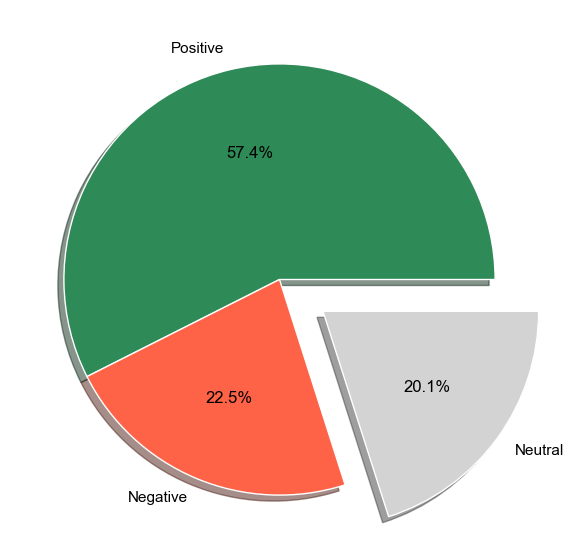

In [50]:
# Importing the matplotlib library
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(15, 7))

# Defining a custom color palette for sentiments
colors = ['#2E8B57', '#FF6347', '#D3D3D3']  # Green for Positive, Red for Negative, Grey for Neutral

# Creating the pie chart with an exploded segment for the smallest group
explode_values = [0, 0, 0.25] if len(label_count) == 3 else [0] * len(label_count)
plt.pie(label_count.values, labels=label_count.index, explode=explode_values, autopct='%1.1f%%', shadow=True, colors=colors)

# Adding a darker font color for better visibility
plt.rcParams['text.color'] = 'black'

# Displaying the plot
plt.show()


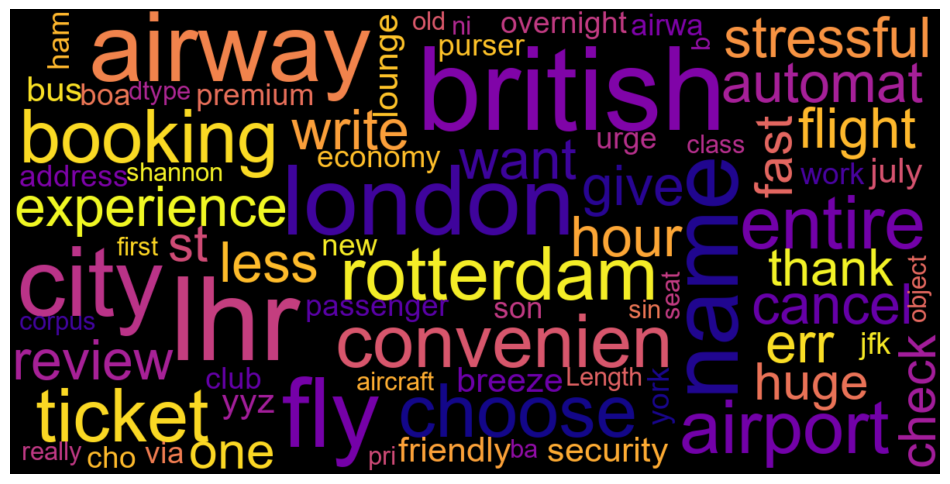

In [36]:
# Importing necessary libraries for creating a word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Defining the set of stopwords
stopwords = set(STOPWORDS)

# Defining the function to show the word cloud
def show_wordcloud(data):
   
    wordcloud = WordCloud(
        background_color='black',  
        stopwords=stopwords,
        max_words=100,
        max_font_size=50,  # Increased max font size for better visibility
        scale=3,
        random_state=1,
        colormap='plasma',  
        font_path='C:/Windows/Fonts/Arial.ttf'  # Specifying a font path for a custom font style
    )
    
    # Generating the word cloud with the input data
    wordcloud = wordcloud.generate(str(data))
    
    # Setting up the figure
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    
    # Displaying the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')  # Using bilinear interpolation for smoother appearance
    plt.show()

# Calling the function with the 'corpus' column of df2
show_wordcloud(df2['corpus'])
